# **Classification**

Problems that need a *quantitative* response (numeric value) are **regression** ; problems that need a *qualitative* response (boolean or category) are **classification**. Many statistical methods can be applied to both types of problems.

**Binary** classification have two output classes. They usually end up being "A" and "not A". Examples are "earthquake" or "no earthquake=noise". **Multiclass** classification refers to one with more than two classes.

Classification here requires that we know the labeled, it is a form of *supervised learning*.

There are several classifier algorithms, which we will summarize below before practicing.

* **Linear Discriminant Analysis (LDA)**: The LDA optimiziation methods produces an optimal dimensionality reductions to a decision line for classificaiton. It is based on variance reduction and has analogy to a PCA coordinate system.

* **Stochastic Gradient Descent (SGD)**:

* **Naive Bayes (NB)**: Simple algorithm that requires little hyper-parameters, provides interpretable results. The algorithm computes conditional probabilities and uses the product as a decision rule to maximize the probability in each class.

* **K-nearest neighbors (KNN)**: Choose *K* as the numbers of nearest data points to consider. Gather each data sample and the K nearest ones, assign the class that is most represented in that group (the mode of the K labels).

* **Support Vector Machine (SVM)**: Finds the hyperplanes that separate the classes with sufficient margins. The hyperplanes can be linear and more complex (kernels SVM such as radial basis function and polynomial kernels). SVM was very popular for limited training data.

* **Random Forest (RF)**: Decision trees are common for prediction pipelines. *Decision tree learning* is a method to create a predictive model of trees based on the data. More on that this monday.

 Some classifiers can handle multi class nateively (Stochastic Gradient Descent - SGD; Random Forest classification;  Naive Bayes). Others are strictly binary classifiers (Logistic Regression, Support Vector Machine classifier - SVM). 

 We can compare them all in one [exercise](!https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).


In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# basic tools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# classifiers from sklearns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
# define models
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]



In [18]:
# make 3 types of data sets
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

In [21]:
print(datasets) 

[(array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.9198063

In [23]:
# choose the first data sets, and use sklearn to classify


# preprocess dataset, split into training and test part
X, y = datasets[0]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# random labels
print(y)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]


In [28]:
#KNN play with K
K=12
clf= KNeighborsClassifier(K)
#clf = classifiers[0]
print(clf)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)



KNeighborsClassifier(n_neighbors=12)
0.95


In [45]:
#svm
clf=classifiers[5]
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.925


[]

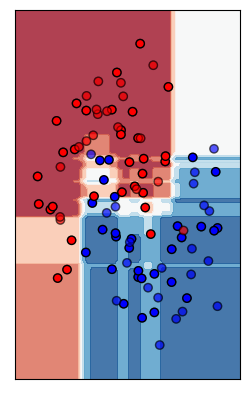

In [46]:
ax = plt.subplot(1,1 + 1, 1)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())

DecisionBoundaryDisplay.from_estimator(
clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
)

# Plot the training points
ax.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
)
# Plot the testing points
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    edgecolors="k",
    alpha=0.6,
)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())


## Classifier Performance Metrics

In a binary classifier, we label one of the two classes as *positive*, the other class is negative. Let's consider *N* data samples.

| True Class      | Positive            | Negative           | Total |
|  -------------  |  -----------------  |  --------------- | ----- |
| Positive        | True positive   | False negative | p     |
| Negative        | False positive  | True negative  | n     |
| **Total**       | p'                  | n'                 | N     |

**True positive (TP)**: the label is predicted as *positive* and it is *correct/true*.

**True negative (TN)**: the label is predicted as *negative* (i.e., the other class) and it is *correct/true*.

**False positive (FP)**: the label is predicted as *positive* and it is *incorrect/false*, it should have been the other class.

**False negative (FN)**: the label is predicted as *negative* and it is *incorrect/false*, it should have been the other class.


**Confusion matrix:**
Count the instances that an element of class *A* is classified in class *B*. A 2-class confusion matrix is:

$ C = \begin{array}{|cc|} TP & FN \\ FP  & TN \end{array}$

The confusion matrix can be extended for a multi-class classification and the matrix is KxK instead of 2x2. The best confusion matrix is one that is close to identity, with little off diagnoal terms.

**Other model performance metics**
Model peformance can be assessed wih the following:
* **error** : the proportion of the data that was misclassified 

    $err = \frac{FP+FN}{N}$  -> 0
* **accuracy**: the proportion of the data that was correctly classified: 
    
    $acc = \frac{TP + TN}{N} = 1 - err $ --> 1
* **TP-rate**: the ratio of samples correctly class in the *positive* class:

    $TPR = \frac{TP}{P}$ --> 1
* **FP-rate**: the ratio of samples that were correctly classified in the *negative* class:

    $FPR = \frac{fp}{n}$ --> 0
* **precision**: the fraction of correctly classified in the first/positive class:

    $Pr = \frac{TP}{TP+FP}$ --> 1
* **recall** or **sensitivity**: fraction of positive samples.

    $Pr = \frac{TP}{TP+FN}$ --> 1

* **specificity**: fraction of well retrieved negative samples.

    $Sp = \frac{TN}{FP+FN}$ --> 1

* **F1 score**:

    $F_1 = \frac{2}{(1/ precision + 1/recall)} = \frac{TP}{TP + (FN+FP)/2} $ --> 1.

    
The harmonic mean of the F1 scores gives more weight to low values. F1 score is thus high if both recall and precision are high.

A good way to evaluate a model is also to use cross-validation


# 1. Data download

We will practice with the MNIST data set. It is a data sets of images of handwritten numbers.

In [47]:
import numpy as np
from sklearn.datasets import load_digits,fetch_openml
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

The data is vector of floats. The target is an integer that is the attribute of the data. How are the data balanced between the classes? How many samples are there per class?

In [48]:
# explore data type
data,y = digits["data"].copy(),digits["target"].copy()
print(type(data[0][:]),type(y[0]))
print(data[0][:])
print(y[0])
print(max(data[0]))
# note that we do not modify the raw data that is stored on the digits dictionary.

<class 'numpy.ndarray'> <class 'numpy.int64'>
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
15.0


 **how many classes are there?**
 Since the classes are integers, we can count the number of classes using the function "unique"

In [49]:
Nclasses = len(np.unique(y))
print(np.unique(y))
print(Nclasses)

[0 1 2 3 4 5 6 7 8 9]
10


### 1.1 Data preparation
First print and plot the data.

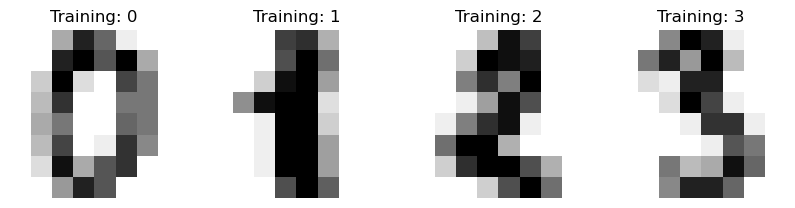

In [50]:
# plot the data
import matplotlib.pyplot as plt
# plot the first 4 data and their labels.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

We look at it and there is little noise and no gap. 

### 1.2 Data re-scaling

We could use MinMaxScaler from ``sklearn.preprocessing`` but since the formula for that is (x-min)/(max-min) and our min is 0, we could directly calculate x/max.
(notes from https://www.kaggle.com/recepinanc/mnist-classification-sklearn)
Note that the raw data is still stored in the dictionary ``digits`` and so we can modify the ``data`` variable in place.

In [51]:
print(min(data[0]),max(data[0]))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)# fit the model for data normalization
newdata = scaler.transform(data) # transform the data. watch that data was converted to a numpy array
print(type(newdata))
print(newdata)

0.0 15.0
<class 'numpy.ndarray'>
[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


### Train-test split

In [52]:
# Split data into 50% train and 50% test subsets
from sklearn.model_selection import train_test_split
print(f"There are {data.shape[0]} data samples")
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.5, shuffle=False)


There are 1797 data samples


## **Binary Classification**

We will first attempt to identify two classes: "5" and "not 5".

In [13]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

We will first use a classic classifier: ***Stochastic Gradient Descent SGD***.  To reproduce the results, you should set the random_state parameter.

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
# test on the first element of the data sample and its label:
print(data[0])
print(y[0])
print("Prediction of the first data '%1.0f' onto whether it belongs to the class 5 is %s." %(y[0],sgd_clf.predict([data[0]])[0]))

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
Prediction of the first data '0' onto whether it belongs to the class 5 is False.


In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3) # predict using K-fold cross validation

In [16]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score 

print("confusion matrix")
print(confusion_matrix(y_train_5,y_train_pred))
print("precison, recall")
print(precision_score(y_train_5,y_train_pred),recall_score(y_train_5,y_train_pred))
print("F1 score")
print(f1_score(y_train_5,y_train_pred))

confusion matrix
[[799   8]
 [ 10  81]]
precison, recall
0.9101123595505618 0.8901098901098901
F1 score
0.8999999999999999


In [17]:
from sklearn.metrics import classification_report
print(f"Classification report for classifier {sgd_clf}:\n"
      f"{metrics.classification_report(y_train_5, y_train_pred)}\n")

NameError: name 'metrics' is not defined

**Precision and recall trade off**: increasing precision reduces recall. The classifier uses a *threshold* value to decide whether a data belongs to a class. Increasing the threhold gives higher precision score, decreasing the thresholds gives higher recall scores. Let's look at the various score values.

In [ ]:
y_score=sgd_clf.decision_function([data[0]])
print(y_score)

In [ ]:
from sklearn.metrics import precision_recall_curve


y_score=cross_val_predict(sgd_clf,X_train,y_train_5,cv=4,method="decision_function")
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_score)
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1],'g-')
plt.legend(['Precision','Recall'])
plt.grid(True)
plt.xlabel('Score thresholds')

In [ ]:
plt.plot(recalls[:-1],precisions[:-1])
plt.grid(True)
plt.ylabel('Precision')
plt.xlabel('Recall')

Given the tradeoff, we can now choose a specific threshold to tune your classification. It seems that the precision drops below 90% when the recall value gets above 90% as well. So we can choose the threshold of 90%.

In [ ]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.9)]
y_train_pred_90 = (y_score >=threshold_90_precision)

print(precision_score(y_train_5,y_train_pred_90))
print(recall_score(y_train_5,y_train_pred_90))

**Receiver Operating Characteristics ROC** 

It plots the true positive rate against the false positive rate.
The ROC curve is visual, but we can quantify the classifier performance using the *area under the curve* (aka AUC). Ideally, AUC is 1.

![ROC curve](roc-curve-v2-glassbox.png)

[source: https://commons.wikimedia.org/wiki/File:Roc-draft-xkcd-style.svg]

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_score)
plt.plot(fpr,tpr,linewidth=2);plt.grid(True)
plt.plot([0,1],[0,1],'k--')

Compare with another classifier method. We will try ***Random Forest*** and compare the two classifiers. Instead of outputing scores, RF works with probabilities. So the value returned as between 0 and 1 with the probability of appartenance to the given class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42) # model design
y_rf_5 = cross_val_predict(rf_clf,X_train,y_train_5,cv=3,method="predict_proba")
y_scores_rf = y_rf_5[:,1] # score in the positive class
fpr_rf,tpr_rf,threshold_rf = roc_curve(y_train_5,y_scores_rf)

In [ ]:
plt.plot(fpr_rf,tpr_rf,'r',linewidth=2)
plt.plot(fpr,tpr,linewidth=2);plt.grid(True)
plt.plot([0,1],[0,1],'k--')

## Multiclass Classification

Here we will use several well known classifiers: Support Vector Machine, k-nearest neighbors, Stochastic Gradient Descent

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine classifier
clf = SVC(gamma=0.001) # model design
clf.fit(X_train, y_train) # learn
svc_prediction = clf.predict(X_test) # predict on test
print("SVC Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=svc_prediction))

# K-nearest Neighbors
knn_clf = KNeighborsClassifier() # model design
knn_clf.fit(X_train, y_train) # learn
knn_prediction = knn_clf.predict(X_test) # predict on test
print("K-nearest Neighbors Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=knn_prediction))

# Random Forest
rf_clf = RandomForestClassifier(random_state=42, verbose=True) # model design
rf_clf.fit(X_train, y_train)# learn
rf_prediction = rf_clf.predict(X_test) # predict on test
print("Random Forest Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=rf_prediction))

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, rf_prediction):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [ ]:
print("Support Vector Machine")
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, svc_prediction)}\n")
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
print("K-nearest neighbors")
print(f"Classification report for classifier {knn_clf}:\n"
      f"{metrics.classification_report(y_test, knn_prediction)}\n")
disp = metrics.plot_confusion_matrix(knn_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
print("Random Forest")
print(f"Classification report for classifier {rf_clf}:\n"
      f"{metrics.classification_report(y_test, rf_prediction)}\n")
disp = metrics.plot_confusion_matrix(rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

### Multiclass classification

In [ ]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm

from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])

X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.5, shuffle=False)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot of a ROC curve for a specific class
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(Nclasses):
    plt.plot(fpr[i], tpr[i], label='ROC label %1.0f (area = %0.2f)' % (i,roc_auc[i]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")